In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu124


## Introduction to Tensors

### Creating tensors

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type. https://pytorch.org/docs/stable/tensors.html

using the torch.tensor() constructor:

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
#get tensor back as python int
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7,8],
            [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([7, 8])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],
             [3,6,9],
             [5,6,10]]])
TENSOR

tensor([[[ 1,  2,  3],
         [ 3,  6,  9],
         [ 5,  6, 10]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

### Tensor shape and Ndim:
use the square bracket counting to check number of dimensions for TENSOR

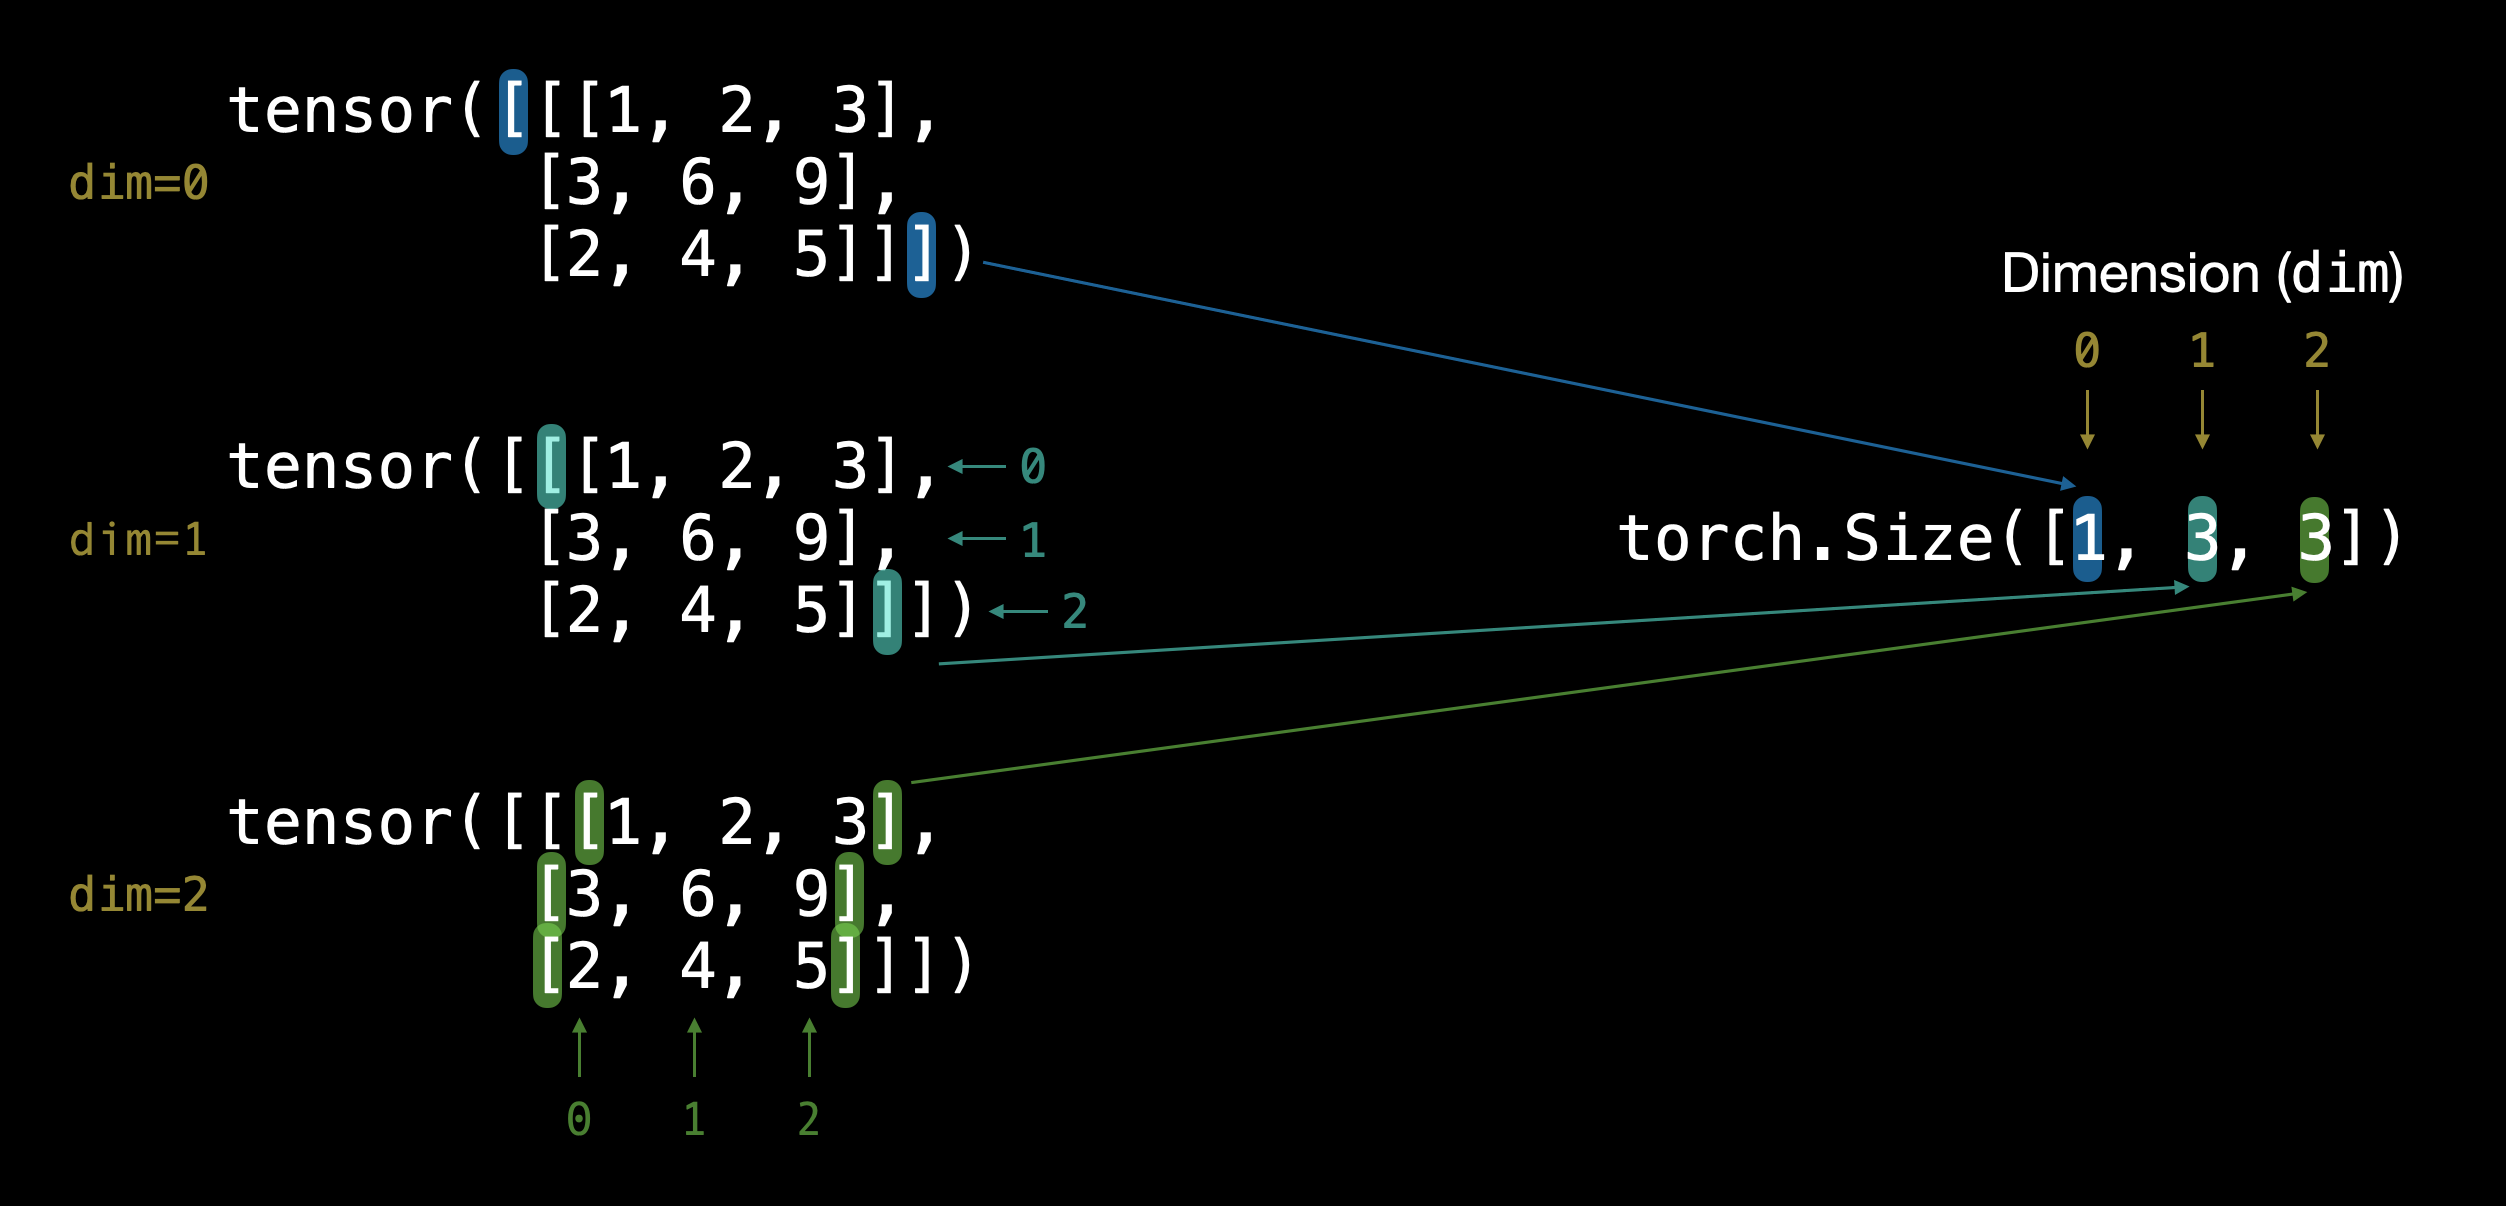

### Radom tensors

Why random tensors?
Many neural networks start with tensors full of random numbers
https://pytorch.org/docs/main/generated/torch.rand.html

In [ ]:
# Create a random tensor
random_tensor = torch.rand(1,4,4)
random_tensor

tensor([[[0.7963, 0.3414, 0.2223, 0.5519],
         [0.1477, 0.0898, 0.3535, 0.0312],
         [0.4596, 0.5948, 0.4571, 0.7291],
         [0.0685, 0.4107, 0.8168, 0.2141]]])

In [ ]:
random_tensor.ndim

3

In [ ]:
# Create a random tensor similar to a image tensor
rand_img_tensor = torch.rand(size=(224,224,3))# height,width,color channels
rand_img_tensor.shape, rand_img_tensor.ndim

(torch.Size([224, 224, 3]), 3)

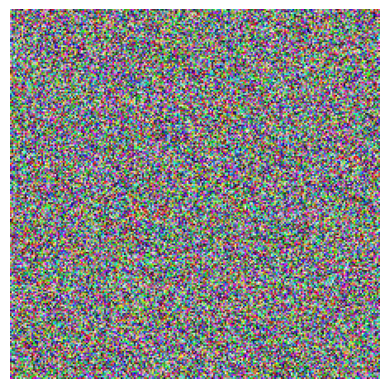

In [ ]:
import matplotlib.pyplot as plt

rand_img_np = rand_img_tensor.numpy()
plt.imshow(rand_img_np)
plt.axis('off')  # Hide axes
plt.show()

### Zeros and ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones((3,4))
ones


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
zeros.dtype # torch.ones are float

torch.float32

### Creating a range of tensors and tensors-like

Returns a tensor filled with the scalar value 0 , with the same size as input

In [ ]:
# Use torch.arange()
one_to_ten = torch.arange(start=1,end=11,step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes
Note: Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning.
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                 dtype=None, # What datatype is the tensor
                 device=None, # What device is this tensor on
                 requires_grad=False) # Whether or not to track gradients

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
# Convert float 32 tensor into float 16 tensor
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors Attributes
1. datatype: `tensor.dtype`
2. shape: `tensor.shape`
3. right device: `tensor.device`

In [ ]:
# Create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.1544, 0.7378, 0.2467, 0.8756],
        [0.5775, 0.3461, 0.5078, 0.7544],
        [0.9972, 0.3373, 0.3199, 0.4522]])

In [ ]:
some_tensor.size(),some_tensor.shape

(torch.Size([3, 4]), torch.Size([3, 4]))

In [ ]:
# Find out details about some tensor
print(some_tensor)
print(f"DataType of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"device of tensor: {some_tensor.device}")


tensor([[0.1544, 0.7378, 0.2467, 0.8756],
        [0.5775, 0.3461, 0.5078, 0.7544],
        [0.9972, 0.3373, 0.3199, 0.4522]])
DataType of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
device of tensor: cpu


### Manipulating Tensors
* Add Sub
* Multiplication(element-wise)
* Division
* Matrix multiplication

In [ ]:
# Add 10
tensor = torch.tensor([1,2,3])
tensor + 100

tensor([101, 102, 103])

In [ ]:
# Multiply 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Sub 10
tensor - 10

tensor([-9, -8, -7])

In [ ]:
torch.add(tensor,10)

tensor([11, 12, 13])

In [ ]:
torch.mul(tensor,10)

tensor([10, 20, 30])

### Matrix Multiplication
Two main ways of performing multiplication in neural networks and deep learning:
1. Element-wise multiplication
2. Matrix mutliplication - dot product

In [ ]:
# Element-wise multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix mutliplication(dot product)
torch.matmul(tensor,tensor)

tensor(14)

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(tensor)

tensor([1, 2, 3])
CPU times: user 956 µs, sys: 0 ns, total: 956 µs
Wall time: 1.99 ms


In [ ]:
%%time
torch.matmul(tensor,tensor)

CPU times: user 69 µs, sys: 13 µs, total: 82 µs
Wall time: 85.4 µs


tensor(14)

torch.matmul is much faster than dot product in a loop!

### Multiplication -- Shape Error

In [ ]:
tensor_A = torch.tensor([[1,2],
             [3,4],
             [5,6]])

tensor_B = torch.tensor([
    [7,10],
    [8,11],
    [9,11]
])
torch.mm(tensor_A,tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

### Transpose

In [ ]:
tensor_A

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
tensor_A.shape

torch.Size([3, 2])

In [ ]:
tensor_A.T

tensor([[1, 3, 5],
        [2, 4, 6]])

In [ ]:
tensor_A.T.shape

torch.Size([2, 3])

In [ ]:
torch.mm(tensor_A,tensor_B.T)

tensor([[ 27,  30,  31],
        [ 61,  68,  71],
        [ 95, 106, 111]])

In [ ]:
torch.mm(tensor_B.T,tensor_A)

tensor([[ 76, 100],
        [ 98, 130]])

### Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
torch.mean(x)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

DataType Error: input cant be float64(long)

In [ ]:
x.dtype

torch.int64

In [ ]:
torch.mean(x.type(torch.float32))

tensor(45.)

In [ ]:
torch.sum(x),x.sum()

(tensor(450), tensor(450))

### Find the positional min and max
return index position of target tensor

In [ ]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
x.argmin()

tensor(0)

In [ ]:
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(90)

### Reshaping,stacking,squeezing and unsqueezing tensors
helping us fix shape and dimension issues with our tensors

In [ ]:
# Create a tensor
import torch
x = torch.arange(1.,10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

### Reshape
* reshapes an input tensor to a defined shape,
* but has to be compatible with the original size

In [ ]:
# Add an extra dim
x_reshape = x.reshape(1,7)

RuntimeError: shape '[1, 7]' is invalid for input of size 9

In [ ]:
# Add an extra dim
x_reshape = x.reshape(2,7)
x_reshape

RuntimeError: shape '[2, 7]' is invalid for input of size 9

In [ ]:
# Add an extra dim
x_reshape = x.reshape(1,9)
x_reshape

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# Add an extra dim
x_reshape = x.reshape(9,1)
x_reshape,x_reshape.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

### Change the view
* view shares the same memory with the original tensor
* changing z changes x

In [ ]:
z = x.view(1,9)
z, z.shape, x

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 torch.Size([1, 9]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
z[:,0] = 5
z,x # both z[0] and x[0] will become 5

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

### Concatenates a sequence of tensors using Stack

In [ ]:
x_stack = torch.stack((x,x,x)) # 0 rolls
x_stack

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
x_stack = torch.stack((x,x,x),dim=1) # 1 cols
x_stack

tensor([[5., 5., 5.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.],
        [7., 7., 7.],
        [8., 8., 8.],
        [9., 9., 9.]])

### Squeeze:Remove all single dimensions from a target tensor

In [ ]:
x_reshape.shape

torch.Size([9, 1])

In [ ]:
x_reshape.squeeze()

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
print(f"Previous tensor: {x_reshape}")
print(f"Previous shape: {x_reshape.shape}")

# Using squeeze to remove extra single dim
x_squeezed = x.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
Previous shape: torch.Size([9, 1])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


### Unsqueeze：insert a dimension at the specified position

In [ ]:
print(f"Previous tensor:{x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add a extra dim at specified position
x_unsqueezed = x_squeezed.unsqueeze(dim=1)
print(f"New tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor:tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])
New tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
New shape: torch.Size([9, 1])


In [ ]:
print(f"Previous tensor:{x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add a extra dim at dim=0
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"New tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor:tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])
New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


### Rearranges the dimensions of a target tensor Using permute

In [ ]:
# an example used in img process
x_original = torch.rand(size=(224,224,3)) # height,width,color channels

# permute the color channel into first index
x_permuted = x_original.permute(2,0,1)
x_original.shape, x_permuted.shape

(torch.Size([224, 224, 3]), torch.Size([3, 224, 224]))

## indexing： selecting data form tensors

In [2]:
import torch
x = torch.arange(1,10).reshape(1,3,3)
x,x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

index on the outer bracket

In [3]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

index on the middle bracket

In [4]:
x[0,0]

tensor([1, 2, 3])

index on the inner bracket

In [5]:
x[0,0,1]

tensor(2)

use `:` to select "all" of a target dimension

In [6]:
x[:,:,1]

tensor([[2, 5, 8]])

In [7]:
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [8]:
x[:,1,1]

tensor([5])

In [9]:
x[0,0,:]

tensor([1, 2, 3])

## Pytorch tensor & Numpy
* Numpy -> tensor `torch.from_numpy(ndarray)`
* tensor -> Numpy `torch.Tensor.mupy()`

In [10]:
import torch
import numpy as np

array = np.arange(1.0,8.0)
array

array([1., 2., 3., 4., 5., 6., 7.])

### change numpy into tensor

In [11]:
tensor = torch.from_numpy(array)
tensor

tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)

* numpy dtype:float64
* tensor dtype:float32

In [12]:
array.dtype

dtype('float64')

In [13]:
torch.arange(1.,8.).dtype

torch.float32

In [14]:
# change dtype of tensor
tensor = torch.from_numpy(array).type(torch.float32)
tensor.dtype

torch.float32

### change tensor into Numpy

In [15]:
tensor = torch.ones(7)
tensor

tensor([1., 1., 1., 1., 1., 1., 1.])

In [16]:
numpy_tensor = tensor.numpy()
numpy_tensor

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

## Reoroducbility
random seed: "flavour" the randomness

To reduce the randomness in neural networks.

In [18]:
# Create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.8740, 0.2760, 0.5419, 0.3537],
        [0.0131, 0.5074, 0.8303, 0.9937],
        [0.0900, 0.6339, 0.7688, 0.0920]])
tensor([[0.6674, 0.9159, 0.0357, 0.3705],
        [0.3838, 0.7698, 0.7737, 0.2956],
        [0.8226, 0.3910, 0.3175, 0.7605]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


Random but reproducible tensors

Random_SEED =1234

torch.manual_seed(Random_SEED)

In [ ]:
import torch

# Set the random seed
Random_SEED =1234
torch.manual_seed(Random_SEED)

random_tensor_C = torch.rand(3,4)

torch.manual_seed(Random_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.0290, 0.4019, 0.2598, 0.3666],
        [0.0583, 0.7006, 0.0518, 0.4681],
        [0.6738, 0.3315, 0.7837, 0.5631]])
tensor([[0.0290, 0.4019, 0.2598, 0.3666],
        [0.0583, 0.7006, 0.0518, 0.4681],
        [0.6738, 0.3315, 0.7837, 0.5631]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [20]:
import torch

# Set the random seed
Random_SEED =1234
torch.manual_seed(Random_SEED)

random_tensor_C = torch.rand(3,4)

torch.manual_seed(Random_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.0290, 0.4019, 0.2598, 0.3666],
        [0.0583, 0.7006, 0.0518, 0.4681],
        [0.6738, 0.3315, 0.7837, 0.5631]])
tensor([[0.0290, 0.4019, 0.2598, 0.3666],
        [0.0583, 0.7006, 0.0518, 0.4681],
        [0.6738, 0.3315, 0.7837, 0.5631]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Check for GPU access with PyTorch

In [1]:
import torch


In [3]:
# Check for GPU access with Python
torch.cuda.is_available()

True

In [5]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [6]:
# Count number of devices
torch.cuda.device_count()

1